In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/OSU/CS467_shared/Data' 

/content/drive/My Drive/Colab Notebooks/OSU/CS467_shared/Data


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
!ls

features.csv	   genres_model.csv  raw_genres.csv
fma_spect_images   labels_key.csv    tracks.csv
genreclassutil.py  master_list.csv   tracks_wpath.csv


In [ ]:
genres = {} 
genres_fname = 'genres_model.csv'
with open(genres_fname, newline='') as genres_list:
  reader = csv.reader(genres_list, delimiter=',')
  for row in reader:
    if row[0] != 'genre_id' and int(row[0]) not in genres:
      genres[int(row[0])] = int(row[2])
  
# for key, value in genres.items():
  # print('id:{} genres:{}'.format(key, value))

In [ ]:
id_list_fname = 'master_list.csv'
ids = []
with open(id_list_fname, newline='') as id_list:
  reader = csv.reader(id_list, delimiter=' ')
  for row in reader:
    ids.append(int(', '.join(row)))

In [ ]:
label_key_fname = 'labels_key.csv'
label_key = {}
with open(label_key_fname, newline='') as labels_key_file:
  reader = csv.reader(labels_key_file, delimiter=',')
  for row in reader:
    if row[0] != 'key':
      label_key[int(row[0])] = int(row[1])

for key, value in label_key.items():
  print('key:{}, label:{}'.format(key, value))

key:3, label:0
key:4, label:1
key:5, label:2
key:8, label:3
key:9, label:4
key:10, label:5
key:12, label:6
key:13, label:7
key:14, label:8
key:15, label:9
key:17, label:10
key:18, label:11
key:19, label:12
key:20, label:13
key:21, label:14
key:25, label:15
key:26, label:16
key:27, label:17
key:31, label:18
key:38, label:19
key:41, label:20
key:42, label:21
key:66, label:22
key:85, label:23
key:103, label:24
key:107, label:25
key:109, label:26
key:181, label:27
key:182, label:28
key:183, label:29
key:296, label:30
key:1235, label:31


In [ ]:
tracks_fname = 'tracks.csv'
tracks = {}
# get all track labels
with open(tracks_fname, newline='') as track_files:
  reader = csv.reader(track_files, delimiter=',')
  for row in reader:
    if row[0] != 'track_id':
      track_labels_array = row[4][1:-1].split(',')
      track_labels=set()
      for i in range(0, len(track_labels_array)): 
        label_int = int(track_labels_array[i])
        if label_int in genres:
          track_labels.add(label_key[genres[label_int]])
      tracks[int(row[0])] = track_labels

In [ ]:
labels = {}
for id in ids:
  if id in tracks:
    # if at least on label exists
    if len(tracks[id]) > 0:
      labels[id] = tracks[id]

In [ ]:
def FMA_spect_loc_get(sid, dl_dir="fma_spect_images/"):
  sid = str(sid).zfill(6)
  path = dl_dir + sid[0:3] +'/'+ sid + '.png'
  if os.path.isfile(path):
    return path
  else:
    print('file at ' + path + ' not found')

In [ ]:
#building spect_locs dictionary
spect_locs = {}
for track in labels:
  spect_locs[track] = FMA_spect_loc_get(track)
  # print(track, spect_locs[track] )

In [ ]:
for key, value in labels.items():
  print('id:{} genres:{}'.format(key, value), 'loc:{}'.format(spect_locs[key]))

Streaming output truncated to the last 5000 lines.
id:147551 genres:{1, 25, 7} loc:fma_spect_images/147/147551.png
id:147552 genres:{25, 10, 31} loc:fma_spect_images/147/147552.png
id:147553 genres:{10, 28, 31} loc:fma_spect_images/147/147553.png
id:147554 genres:{9, 19, 29} loc:fma_spect_images/147/147554.png
id:147555 genres:{9, 19, 29} loc:fma_spect_images/147/147555.png
id:147556 genres:{9, 19, 29} loc:fma_spect_images/147/147556.png
id:147557 genres:{9, 19, 29} loc:fma_spect_images/147/147557.png
id:147558 genres:{9, 19, 29} loc:fma_spect_images/147/147558.png
id:147559 genres:{9, 19, 29} loc:fma_spect_images/147/147559.png
id:147560 genres:{9, 19, 29} loc:fma_spect_images/147/147560.png
id:147561 genres:{9, 19, 29} loc:fma_spect_images/147/147561.png
id:147562 genres:{9, 19, 29} loc:fma_spect_images/147/147562.png
id:147563 genres:{9, 19, 29} loc:fma_spect_images/147/147563.png
id:147564 genres:{9, 19, 29} loc:fma_spect_images/147/147564.png
id:147565 genres:{9, 19, 29} loc:fma_s

In [ ]:
'''
# iterating through each genre folder, append that folder name to the labels list, 
# then we converty the png into a numpy array and append that to images.
# when importing convert the img to grayscale to simplify data
# crop image to remove border  
 for x in label_indexes:
   for subdir, dirs, files in os.walk(rootdir):
     folder_name = os.path.basename(img_dir)
     if (folder_name == x):
       song_count = 0
       for file in files:
         song_count += 1
         labels.append(label_indexes.index(folder_name))
         img = Image.open(os.path.join(subdir, file)).convert('L') # convert rgba img to grayscale
         img = img.crop((55, 50, 390, 250))
         img = img.resize((img_width, img_height))
         img_data = list(img.getdata()) # get raw pixel data
         images.append(img_data)
'''

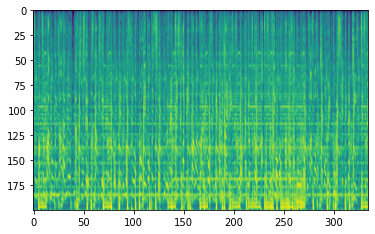

In [ ]:
img = Image.open(spect_locs[2]).convert('L') 
img = img.resize((335, 200))
img_data = list(img.getdata()) # get raw pixel dat
image = np.array(img_data).reshape([335,200])
plt.imshow(img)
plt.show()

In [ ]:
#iterating thru newly created spect_locs dict to build images array
images = []
img_width = 335
img_height = 200
count = 0

for img in spect_locs:
  img = Image.open(spect_locs[img]).convert('L')
  img = img.resize((img_width, img_height))
  img_data = list(img.getdata()) # get raw pixel data
  images.append(img_data)
  count += 1
  if (count % 1000 == 0):
    print(count)

In [ ]:
print(len(images))
print(len(labels))

In [ ]:
print(images[0])
print(labels[0])

In [ ]:
images_dataset = tf.data.Dataset.from_tensor_slices(images)  
labels_dataset = tf.data.Dataset.from_tensor_slices(labels)  
dataset = tf.data.Dataset.zip((images_dataset, labels_dataset))  
print(dataset.element_spec)

(TensorSpec(shape=(67000,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


In [ ]:
tf.data.experimental.save(dataset, './Data/FMA_dataset')

In [ ]:
FMA_dataset = list(tf.data.experimental.load('./FMA_dataset',(tf.TensorSpec(shape=(67000,), dtype=tf.int32, name=None), tf.TensorSpec(shape=(), dtype=tf.int32, name=None))))